# Chatoyant
I built this tool to easily create any colormap for graphs or artistic projects. Moreover, I wanted something easy enough, allowing to build colormaps by building blocks a bit like lego bricks: take some red, add green at the end, finish by a ramp of grey values.
The easiest solution was method chaining, see https://calmcode.io/method-chains/introduction.html for a nice introduction.

In [2]:
import Chatoyant

Colormaps can be simply generated by entering the names of the colors, or a (R, G, B) tuple with values between 0 and 255:

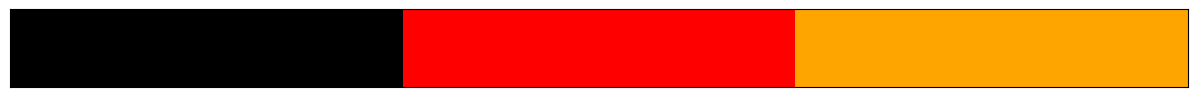

Chatoyant ColorMap cmap1, length 3.

In [3]:
cmap1 = Chatoyant.ColorMap(name='cmap1').from_list(['black', (255, 0, 0), 'orange'])
cmap1

If its name is not specified, it will acquire a default one. We can easily concatenate colormaps with '+'.

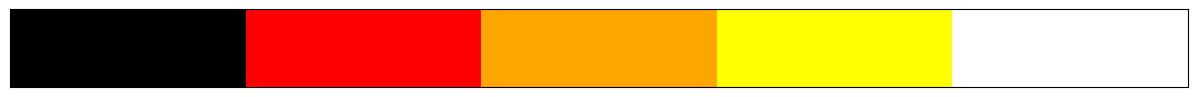

Chatoyant ColorMap cmap1+from_list, length 5.

In [4]:
cmap2 = Chatoyant.ColorMap().from_list(['yellow', 'white'])

cmap1 + cmap2

The colors can be interpolated to get a bigger range of values with 'extend':

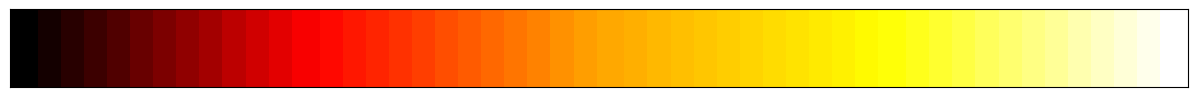

Chatoyant ColorMap cmap1+from_list-Extended_50, length 50.

In [5]:
cmap3 = (cmap1 + cmap2).extend(50)
cmap3

We can rename colormaps if needed (this is cosmetic only):

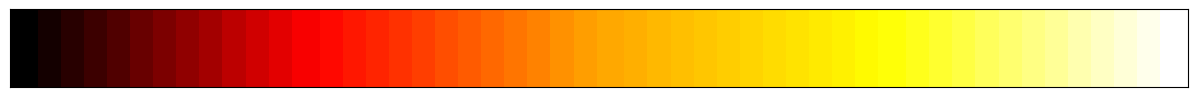

Chatoyant ColorMap Fire (extended), length 50.

In [6]:
cmap3 = cmap3.set_name('Fire (extended)')
cmap3

We can reverse colormaps wit the method 'invert':

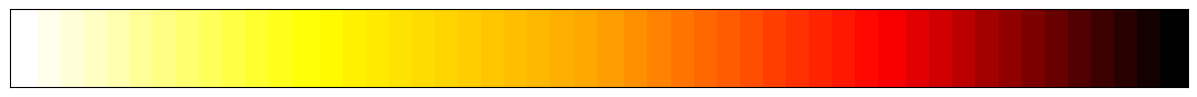

Chatoyant ColorMap Fire (extended)-Inverted, length 50.

In [7]:
cmap3.invert()

We can extract the desired colors simply by slicing the colormap:

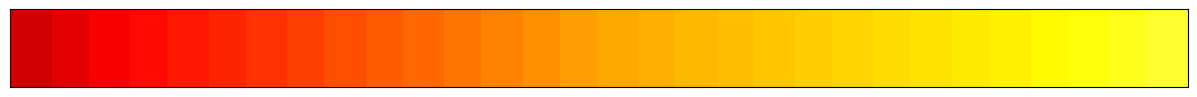

Chatoyant ColorMap Fire (extended)-Sliced, length 30.

In [8]:
cmap3[10:40]

The 'extend' method works when reducing the number of colors as well:

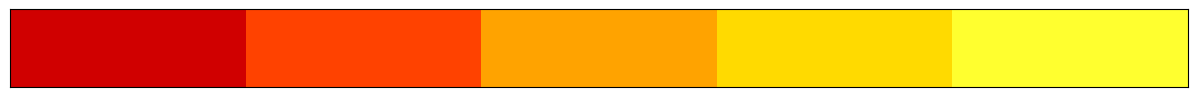

Chatoyant ColorMap Fire (extended)-Sliced-Extended_5, length 5.

In [9]:
cmap3[10:40].extend(5)

### Importing existing colormaps
We can import existing colormaps from matplotlib or bokeh with the dedicated method, specifying the name of the colormap and the desired number of colors:

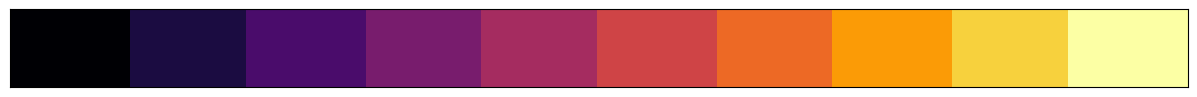

Chatoyant ColorMap inferno, length 10.

In [10]:
Chatoyant.ColorMap().from_matplotlib('inferno', n=10)

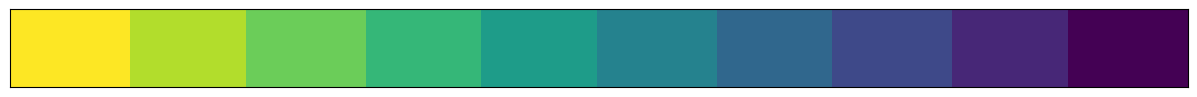

Chatoyant ColorMap Viridis-10-Inverted, length 10.

In [11]:
cmap3 = Chatoyant.ColorMap().from_bokeh('Viridis', n=10) # Bokeh has a strict number of colors for its colormaps.
cmap3.invert()

### Complex operations

All these colormaps can be concatenated and for example, looped:

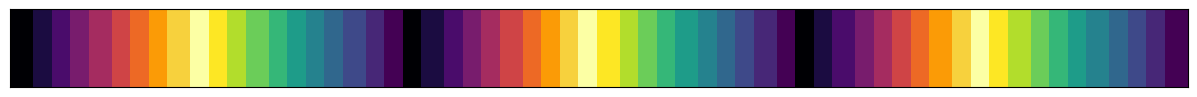

Chatoyant ColorMap inferno+Viridis-10-Inverted-Looped_2, length 60.

In [12]:
cmap3 = Chatoyant.ColorMap().from_matplotlib('inferno', n=10)
cmap4 = Chatoyant.ColorMap().from_bokeh('Viridis', n=10).invert()

(cmap3 + cmap4).loop(n=2)

We can shift the global hue:

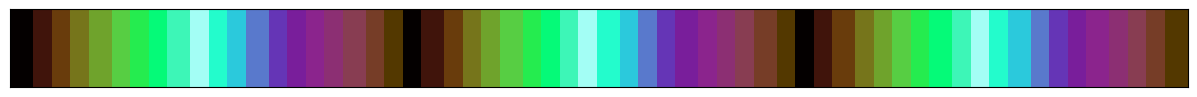

Chatoyant ColorMap inferno+Viridis-10-Inverted-Looped_2-HLS-Shifted-RGB, length 60.

In [13]:
cmap5 = (cmap3 + cmap4).loop(n=2)

cmap5.shift_hue(by=80) # All values are normalised between 0 and 255

Or for better control, we can first convert the colormap to HLS format and then modify any component. Here, we desaturate it.

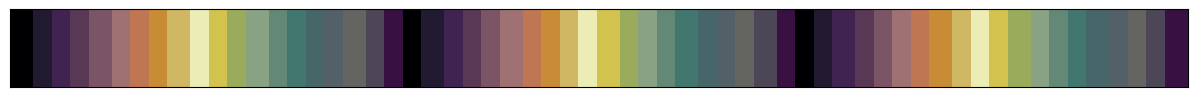

Chatoyant ColorMap inferno+Viridis-10-Inverted-Looped_2-HLS-Shifted-RGB, length 60.

In [14]:
cmap5.to_HLS().shift(by=(0, 0, -100)).to_RGB()

### Export to Matplotlib or list of tuples:
The colormaps can be easily exported to Matplotlib, to be used in any graphs with 'to_matplotlib':

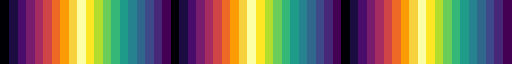

In [15]:
cmap5.to_matplotlib()

Or to a list of (R, G, B) tuples to use for anything else with 'to_tuple_list':

In [16]:
cmap5.to_tuple_list()

[(0, 0, 4),
 (27, 12, 65),
 (74, 12, 107),
 (120, 28, 109),
 (165, 44, 96),
 (207, 68, 70),
 (237, 105, 37),
 (251, 155, 6),
 (247, 209, 61),
 (252, 255, 164),
 (253, 231, 36),
 (178, 221, 44),
 (107, 205, 89),
 (53, 183, 120),
 (30, 156, 137),
 (37, 130, 142),
 (48, 103, 141),
 (62, 73, 137),
 (71, 39, 119),
 (68, 1, 84),
 (0, 0, 4),
 (27, 12, 65),
 (74, 12, 107),
 (120, 28, 109),
 (165, 44, 96),
 (207, 68, 70),
 (237, 105, 37),
 (251, 155, 6),
 (247, 209, 61),
 (252, 255, 164),
 (253, 231, 36),
 (178, 221, 44),
 (107, 205, 89),
 (53, 183, 120),
 (30, 156, 137),
 (37, 130, 142),
 (48, 103, 141),
 (62, 73, 137),
 (71, 39, 119),
 (68, 1, 84),
 (0, 0, 4),
 (27, 12, 65),
 (74, 12, 107),
 (120, 28, 109),
 (165, 44, 96),
 (207, 68, 70),
 (237, 105, 37),
 (251, 155, 6),
 (247, 209, 61),
 (252, 255, 164),
 (253, 231, 36),
 (178, 221, 44),
 (107, 205, 89),
 (53, 183, 120),
 (30, 156, 137),
 (37, 130, 142),
 (48, 103, 141),
 (62, 73, 137),
 (71, 39, 119),
 (68, 1, 84)]